In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

(17381, 76, 10)


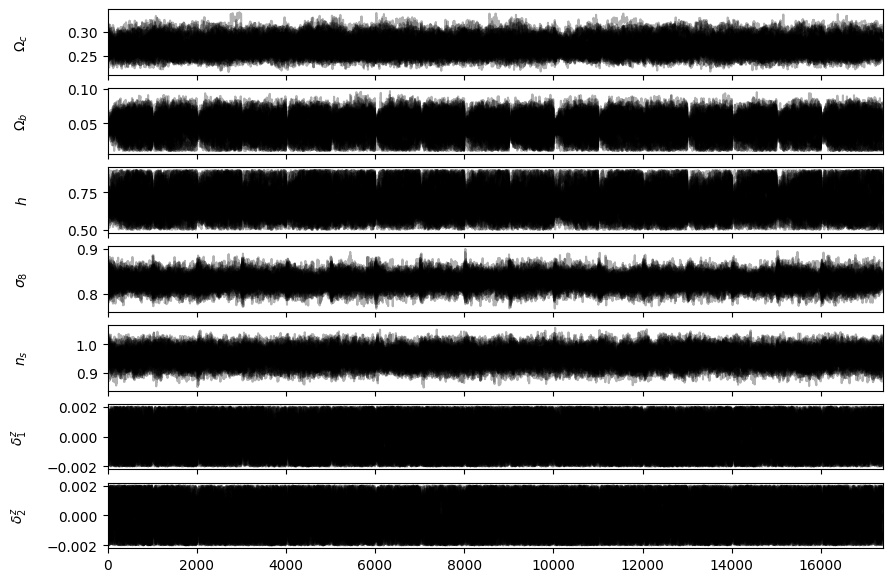

In [2]:
# load in the data
path = '76walkers_chain_outputs.h5'
reader = emcee.backends.HDFBackend(path, read_only=True)
# Get the chain
samples = reader.get_chain()
print(samples.shape)
ndim = 7

# Plot the chain
fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True)
labels = [r"$\Omega_c$", r"$\Omega_b$", r"$h$", r"$\sigma_8$", r"$n_s$", r"$\delta^z_1$", r"$\delta^z_2$", ]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

In [3]:
print(reader.get_autocorr_time())

[330.30654454 331.77459629 336.76557547 291.46276243 299.16449499
 294.00030935 286.88503673 306.04359487 287.02193945 280.28202288]


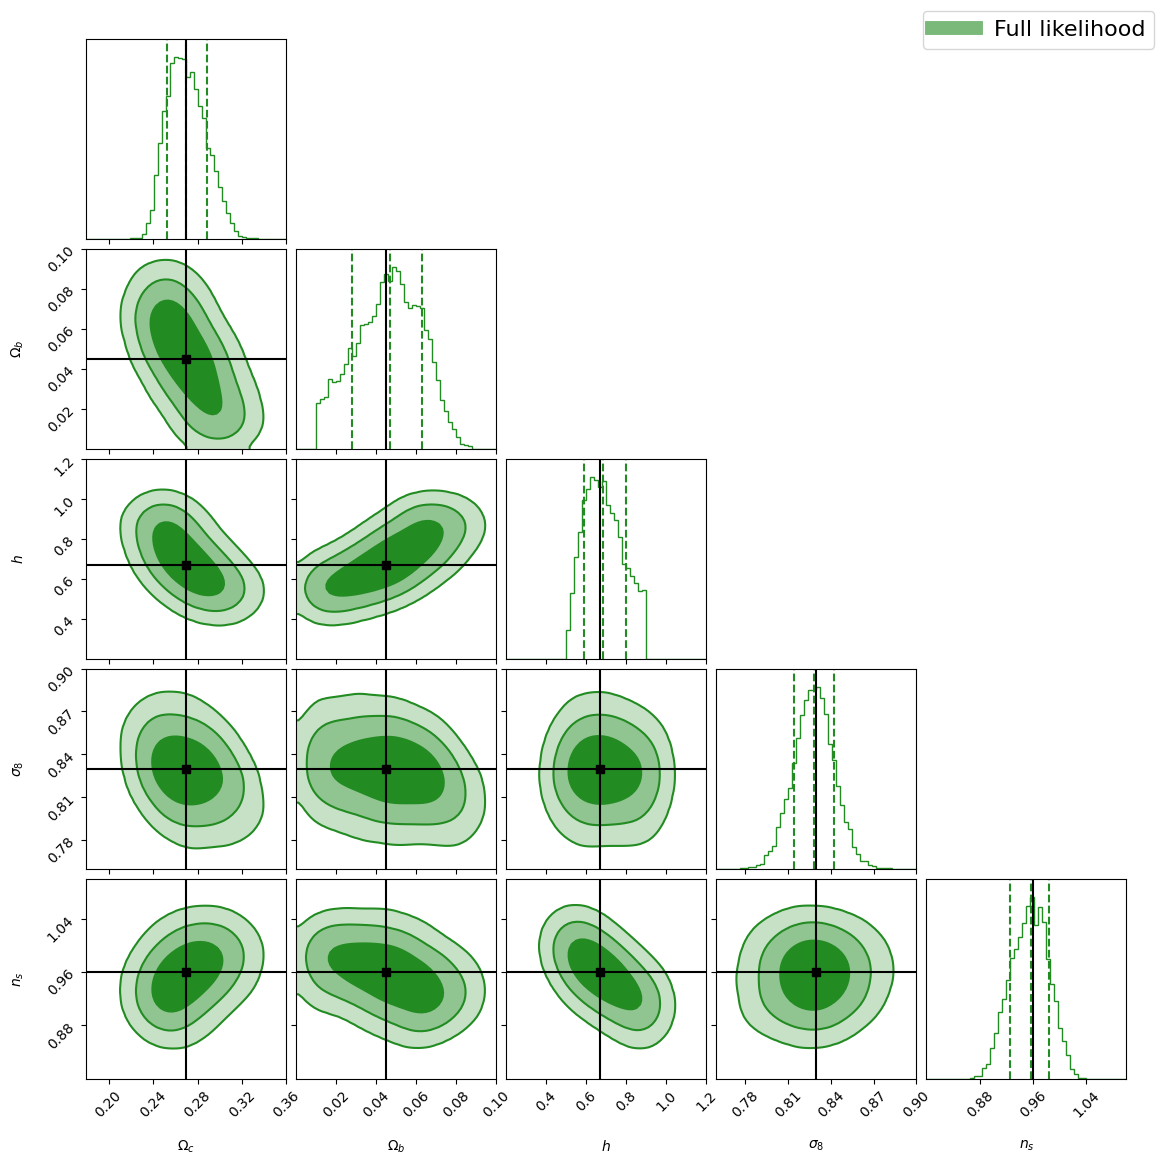

In [4]:
# Thin and flatten the chain
flat_samples = reader.get_chain(discard=900, thin=150, flat=True)

# Drop the last 5 dimensions
flat_samples = flat_samples[:, :5]

# Plot the corner plot
fig = corner.corner(
    flat_samples, 
    labels=labels[:5], 
    truths=[0.27, 0.045, 0.67, 0.83, 0.96],
    quantiles=[0.16, 0.5, 0.84],
    levels=[0.68, 0.95, 0.997],
    plot_datapoints=False,
    fill_contours=True,
    plot_density=True,
    color='forestgreen',
    truth_color='k',
    smooth=3.0,
    bins=50,
    range=[(0.18, 0.36), (0.0, 0.1), (0.2, 1.2), (0.76, 0.9), (0.8, 1.1)],
)

handles = [plt.Line2D([0], [0], color='forestgreen', lw=10, alpha=0.6, label='Full likelihood')]

fig.legend(handles=handles, loc='upper right', fontsize=16)